In [11]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [12]:
#Importing Dependent Libraries
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [13]:
#Function to find the centroid of the black pixels detected in the frame
def find_centroid(frame):
    blackpixels = np.argwhere(frame == 0)  # Get coordinates of black pixels in the image
    # print(blackpixels)
    if len(blackpixels) == 0:  # If no matching pixels, return [0,0]
        return np.array([[0, 0]])
    else:
      centroid = np.mean(blackpixels, axis=0) #Find the centroid of the black object observed in the frame
      return centroid

Part 1 : Read the video and extract individual frames using OpenCV. [15]

Part 2: Read the video and extract individual frames using OpenCV. [15]

Part 3 : Calculate the centroid of the object in every frame (doesn’t have to be very precise). [15]

In [14]:

#Reading video frame by frame and saving a random frame
cap = cv.VideoCapture("/content/drive/MyDrive/ENPM673/Project1/object_tracking.mp4")
save_centroids = []
i=0
zero_centroid = np.array([0, 0])
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #Converting the colour image to gray image
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    if i ==500:
      saveframe=frame
    i=i+1
    #Calculating the centroid of the black object
    centroid = find_centroid(gray)
    if not np.array_equal(centroid, zero_centroid):
      save_centroids.append(centroid)

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


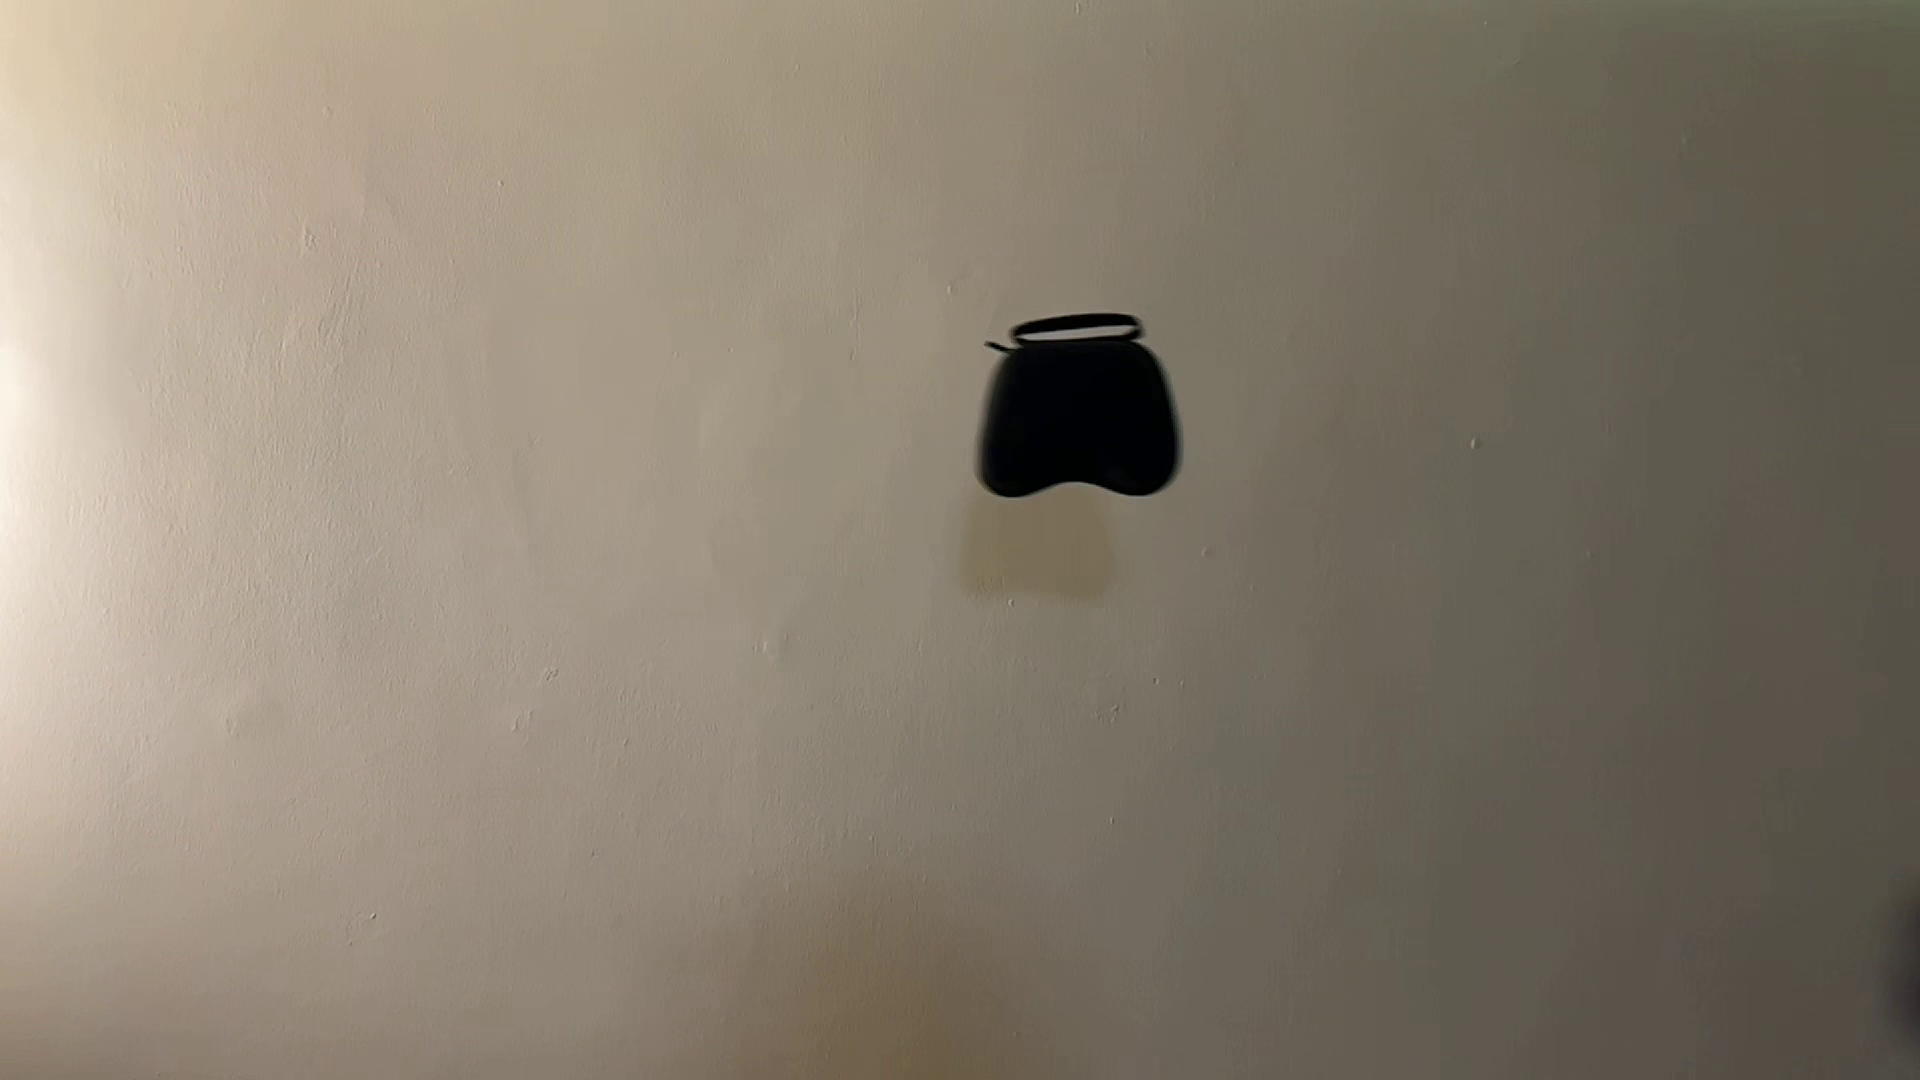

In [15]:
#Displaying the saved frame
cv2_imshow(saveframe)

I will use this frame to plot all the centroid points obtained from the video and also plot the parabola using Standard Least Square

In [16]:
# # Filter out [0, 0] points from the centroid list as it is not required
filtered_centroids = [i for i in save_centroids if not np.array_equal(i, [0, 0])]
x = []
y = []
for point in filtered_centroids:
    if len(point) == 2:
        x.append(point[1])
        y.append((point[0]))

Plotting the obtained centroid points prior to fitting a parabola on a frame obtained from the video


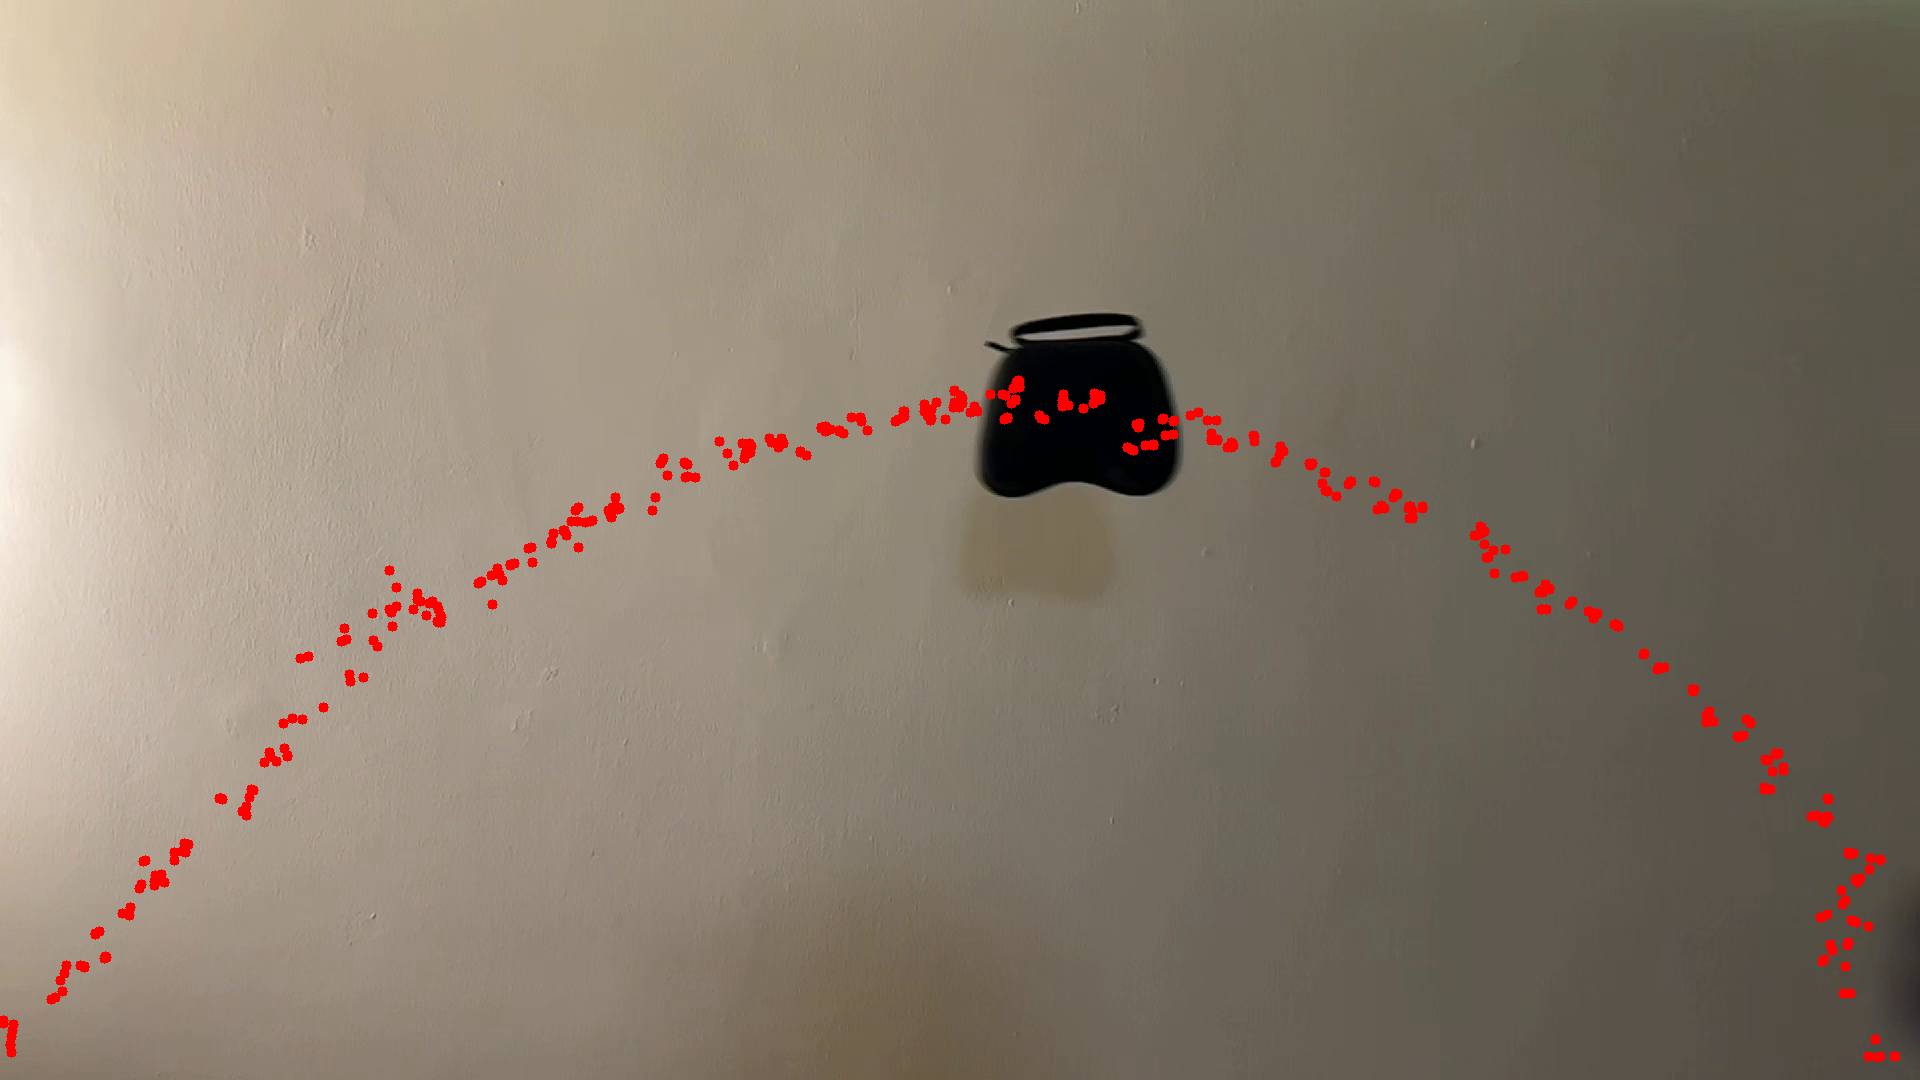

In [17]:
for i in range(len(x)):
    cv.circle(saveframe, (int(x[i]), int(y[i])), 5, (0, 0, 255), -1)  # Draw a red filled circle

# Check if the frame is not None before displaying it
if saveframe is not None:
    cv2_imshow(saveframe)
else:
    print("Frame is None. There might be an issue with reading the frame from the video.")


Part 4 : Assume TOP LEFT corner of the frame as 0,0 and accordingly use ‘Standard Least Square’ to fit a curve (parabola)
through the found centroids in part 3. [20]

In [18]:
#Function to find the coefficients of the equation y = ax^2 + bx + c
def fitCurveWithLeastSquare(x,y):
    o = np.ones(x.shape)
    z = np.vstack((np.square(x), x, o)).T
    t1 = np.dot(z.transpose() , z)
    t2 = np.dot(np.linalg.inv(t1), z.transpose())
    A = np.dot(t2, y.reshape(-1, 1))
    return A

#Finding equation of parabola for obtained x and y values of the centroids
x=np.array(x)
y=np.array(y)
coeff=fitCurveWithLeastSquare(x,y)

In [19]:
print(coeff)

[[ 6.78119055e-04]
 [-1.34792812e+00]
 [ 1.06875410e+03]]


Form the Equation from the obtained value of the coefficients and find the corresponding y value when x =1000

Part 5 : Given that x axis value is 1000, find the y axis value for calculated equation in part 4. [10]

In [20]:
x_eq=1000
y_eq=(coeff[0]*(x_eq**2))+(coeff[1]*x_eq)+(coeff[2])
print("For the given x axis value as 1000, the y axis value is: ", y_eq)

For the given x axis value as 1000, the y axis value is:  [398.94503082]


Part 6 : Capture any one frame from the video (which shows the object) and plot the obtained equation. [20]

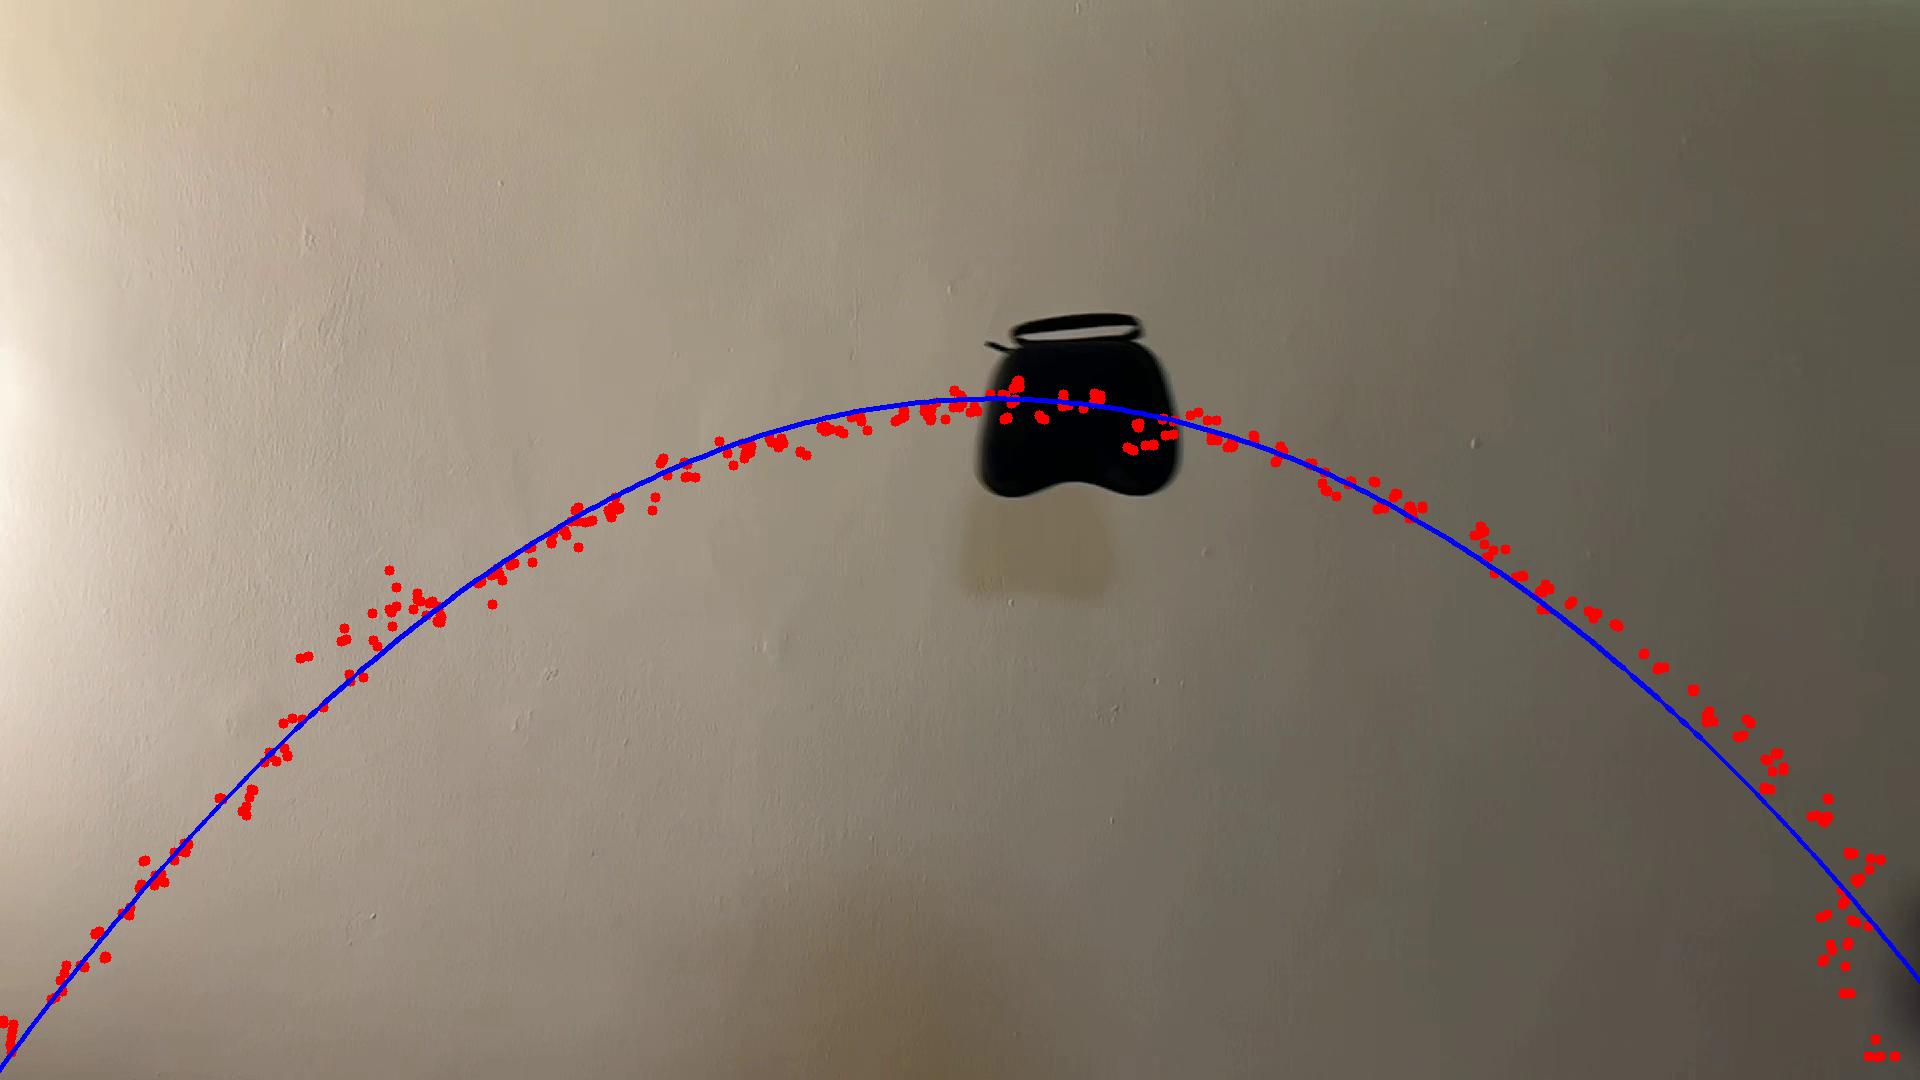

In [21]:
import numpy as np
import cv2 as cv

def plotLSCurve(coef, x, y, frame):
    x_min = np.min(x)
    x_max = np.max(x)

    # Generate points along the curve
    x_curve = np.linspace(x_min - 100, x_max + 100, 300)
    o_curve = np.ones(x_curve.shape)
    z_curve = np.vstack((np.square(x_curve), x_curve, o_curve)).T
    y_curve = np.dot(z_curve, coef)

    # Convert float coordinates to integers for drawing
    points = np.column_stack((x_curve.astype(int), y_curve.astype(int)))

    # Draw the curve on the frame
    frame_copy = saveframe.copy()  # Make a copy to avoid modifying the original frame
    cv.polylines(frame_copy, [points], False, (255, 0, 0), thickness=4)

    return frame_copy


# Call the function to plot the curve on the image
frame_with_curve = plotLSCurve(coeff, x, y, saveframe)

# Check if the frame is not None before displaying it
if frame_with_curve is not None:
    cv2_imshow( frame_with_curve)
    cv.waitKey(0)
    cv.destroyAllWindows()
else:
    print("Frame with curve is None. There might be an issue with the plotLSCurve function.")
